# BSS Utilization Rate Example

This script showcases an example for evaluating BSS utilization rates.

Author: elenia@TUBS

Copyright 2024 elenia

This file is part of eELib, which is free software under the terms of the GNU GPL Version 3.

In [1]:
# imports
import os
import pandas as pd
import numpy as np
import fnmatch
import matplotlib.pyplot as plt
from eelib.utils.eval import evaluation_utils
from eelib.utils import colormap
import seaborn as sns

In [2]:
# The folder where we want to store our csv files
csv_folder_path = os.path.join(os.getcwd(), "demo_files")

We can display things like the utilization rates of a BSS if we have enough data for long enough. For example if we have the data for a year, we can create a heatmap that shows the state of a BSS for each day in a single line.

Assuming the data matches the structure of a compacted dataframe where each row is a timestep and each column the values of a singular timeseries (Here, it is as if we have dropped all non-relevant columns so only the data for a BSS remains):

In [3]:
df_bss_state = pd.read_csv(os.path.join(csv_folder_path, "BS_Potential.csv"), index_col=0)
print(df_bss_state.shape)
df_bss_state.head()

(35040, 2)


P       SoC
0  0.000  0.499997
1 -0.282  0.485886
2 -0.270  0.472334
3 -0.269  0.458859
4 -0.458  0.435927

We can modify it for ease of operation.

In [4]:
# Create new column for day
df_bss_state["day"] = df_bss_state.index.values / 96
df_bss_state["day"] = df_bss_state["day"].apply(lambda x: int(x))
# add new column for time step in that day
df_bss_state["step in day"] = df_bss_state.index.values - df_bss_state["day"] * 96
df_bss_state.head()

P       SoC  day  step in day
0  0.000  0.499997    0            0
1 -0.282  0.485886    0            1
2 -0.270  0.472334    0            2
3 -0.269  0.458859    0            3
4 -0.458  0.435927    0            4

We can then pivot the dataframe so it is of a more desirable shape and then we can draw a heatmap corresponding to the pivoted dataframe.

For the timeseries `P`:

[]

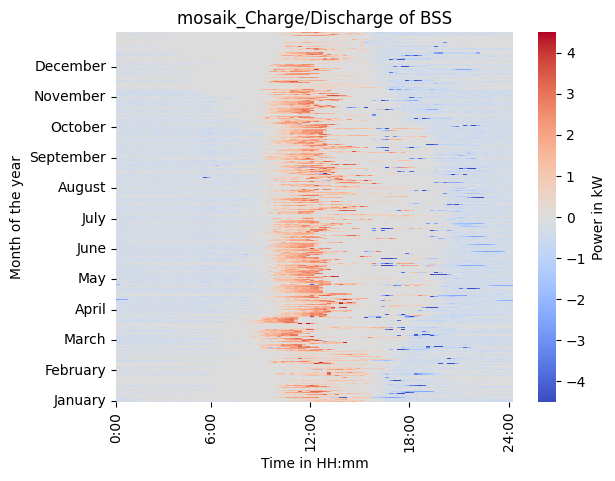

In [5]:
# rows are days, columns are steps in each day. Values are P in that step.
df_bss_state_p = (
    df_bss_state.pivot(index="day", columns="step in day", values="P")
    .reset_index()
    .drop(columns=["day"])
    .sort_index(ascending=False)  # set to True to start with January on x-axis
)

# PLOT: mosaik Charge/Discharge of BSS
plot_P = sns.heatmap(
    df_bss_state_p,
    cmap=sns.color_palette("coolwarm", as_cmap=True),
    cbar_kws={"label": "Power in kW"},
)

plot_P.set(
    xlabel="Time in HH:mm",
    title="mosaik_Charge/Discharge of BSS",
    ylabel="Month of the year",
)
plot_P.set_xticks(np.array([0, 23, 47, 71, 95]))
plot_P.set_xticklabels(["0:00", "6:00", "12:00", "18:00", "24:00"])

# Index always starts with 0 in top left corner, therefore have to set yticks in reverse order
plot_P.set_yticks([*range(34, 394, 30)])
plot_P.set_yticklabels(
    reversed(
        [
            "January",
            "February",
            "March",
            "April",
            "May",
            "June",
            "July",
            "August",
            "September",
            "October",
            "November",
            "December",
        ]
    )
)
plot_P.plot()

For the timeseries `SoC`:

[]

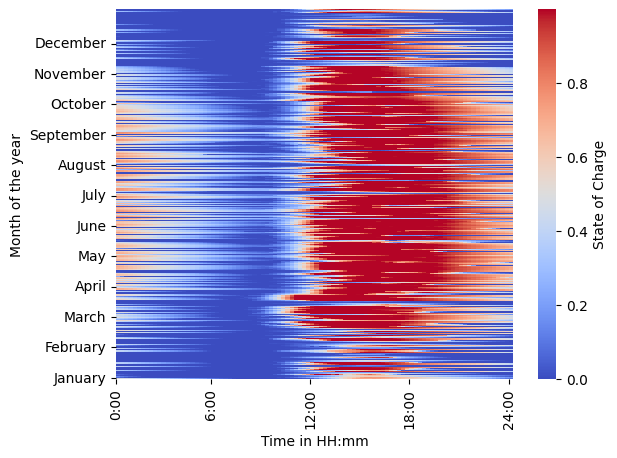

In [6]:
# use pivot function to resort datafarme
df_bss_state_soc = (
    df_bss_state.pivot(index="day", columns="step in day", values="SoC")
    .reset_index()
    .drop(columns=["day"])
    .sort_index(ascending=False)
)

# PLOT: mosaik change of SoC
plot_SOC = sns.heatmap(
    df_bss_state_soc,
    cmap=sns.color_palette("coolwarm", as_cmap=True),
    cbar_kws={"label": "State of Charge"},
)
plot_SOC.set(xlabel="Time in HH:mm", ylabel="Month of the year")
# plot_SOC.set(title = "mosaik_SoC of BSS")

plot_SOC.set_xticks([0, 23, 47, 71, 95])
plot_SOC.set_xticklabels(["0:00", "6:00", "12:00", "18:00", "24:00"])


plot_SOC.set_yticks([*range(34, 394, 30)])
plot_SOC.set_yticklabels(
    reversed(
        [
            "January",
            "February",
            "March",
            "April",
            "May",
            "June",
            "July",
            "August",
            "September",
            "October",
            "November",
            "December",
        ]
    )
)
plot_SOC.plot()